In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import SGD as sgd
from tensorflow.keras.regularizers import l2

In [2]:
NUM_CLASSES = 7

epochs = 1000
batch_size = 8
num_neurons = 30
seed = 10

histories={}

np.random.seed(seed)
tf.random.set_seed(seed)

In [3]:
# scale data
def scale(X, X_min, X_max):
    return (X - X_min)/(X_max-X_min)

#read and divide data into test and train sets 
admit_data = np.genfromtxt('admission_predict.csv', delimiter= ',')
X_data, Y_data = admit_data[1:,1:8], admit_data[1:,-1]
X_data = scale(X_data, np.min(X_data, axis=0), np.max(X_data, axis=0))
Y_data = Y_data.reshape(Y_data.shape[0], 1)

idx = np.arange(X_data.shape[0])
np.random.shuffle(idx)
X_data, Y_data = X_data[idx], Y_data[idx]

idx1 = int(len(X_data)*0.7)
trainX = X_data[:idx1]
trainY = Y_data[:idx1]
testX = X_data[idx1:]
testY = Y_data[idx1:]

trainX = (trainX- np.mean(trainX, axis=0))/ np.std(trainX, axis=0)

# create a network
starter_model = keras.Sequential([
    keras.layers.Dense(num_neurons, activation='relu', kernel_regularizer=l2(1e-3)),
    keras.layers.Dense(1)
])

opt = sgd(learning_rate=1e-3)

starter_model.compile(optimizer=opt,
              loss=keras.losses.MeanSquaredError(),
              metrics=['mse'])


In [4]:
# learn the network
histories['starter'] =starter_model.fit(trainX, trainY,
                                        epochs=epochs,
                                        batch_size=batch_size,
                                        validation_data=(testX,testY),
                                        verbose = 0)


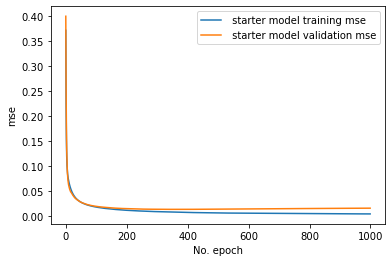

In [5]:
# plot learning curves
plt.plot(histories['starter'].history['mse'], label=' starter model training mse')
plt.plot(histories['starter'].history['val_mse'], label=' starter model validation mse')
plt.ylabel('mse')
plt.xlabel('No. epoch')
plt.legend(loc="upper right")
plt.show()

In [6]:
np.argmin(histories['starter'].history['val_mse'])+1

371

In [7]:
epochs = 371
# create a network
early_stop_model = keras.Sequential([
    keras.layers.Dense(num_neurons, activation='relu', kernel_regularizer=l2(1e-3)),
    keras.layers.Dense(1)
])

opt = sgd(learning_rate=1e-3)

early_stop_model.compile(optimizer=opt,
              loss=keras.losses.MeanSquaredError(),
              metrics=['mse'])


In [8]:
# learn the network
histories['early_stop'] =early_stop_model.fit(trainX, trainY,
                                        epochs=epochs,
                                        batch_size=batch_size,
                                        validation_data=(testX,testY),
                                        verbose = 0)


In [9]:
#Shuffle and choose 50 random samples from test data
idx = np.arange(testX.shape[0])
np.random.shuffle(idx)
testX, testY = testX[idx], testY[idx]
x_rand = testX[:50]
y_rand = testY[:50]

prediction = early_stop_model.predict(x_rand)

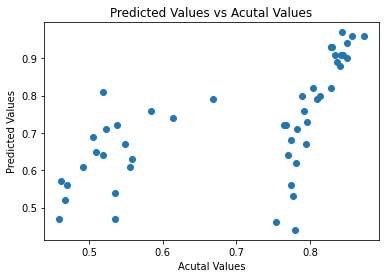

In [10]:
plt.scatter(prediction, y_rand)
plt.ylabel('Predicted Values')
plt.xlabel('Acutal Values')
plt.title('Predicted Values vs Acutal Values')
plt.show()

In [11]:
print(histories['early_stop'].history['val_mse'][-1])

0.016361317
